In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
import zipfile
zip_ref = zipfile.ZipFile('/content/customer-segmentation-tutorial-in-python.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [56]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [58]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [60]:
cols = df.columns
cols


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [61]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [62]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


univariate variable analysis

<Figure size 800x400 with 0 Axes>

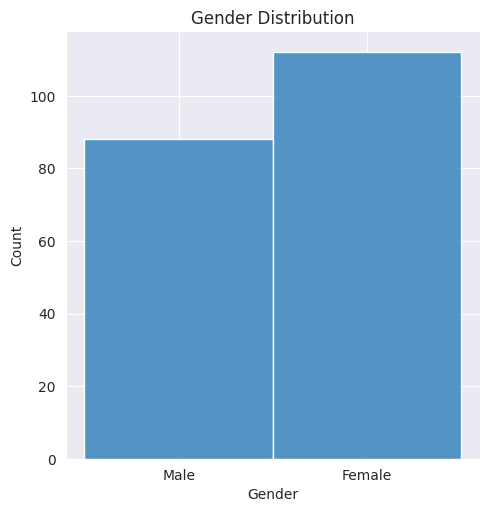

In [65]:
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
sns.displot(df["Gender"], bins=30)
plt.title("Gender Distribution")
plt.show()

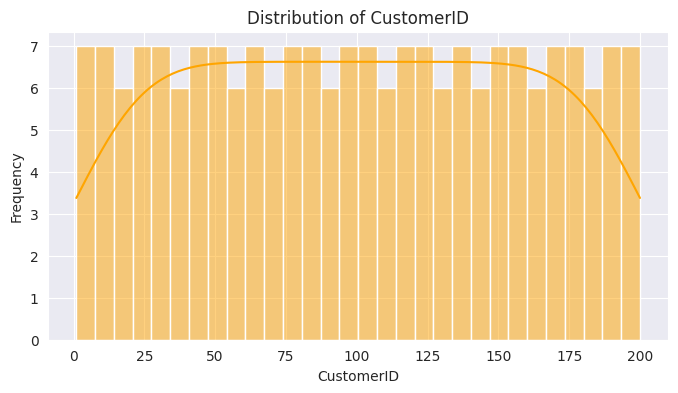

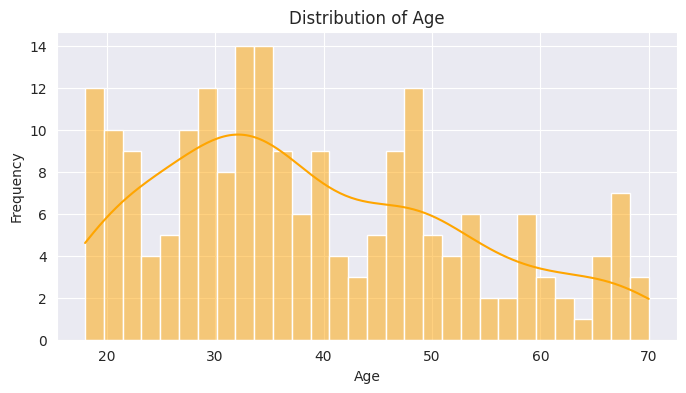

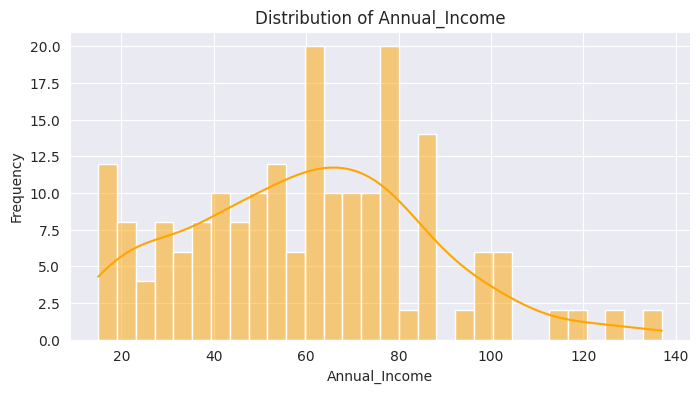

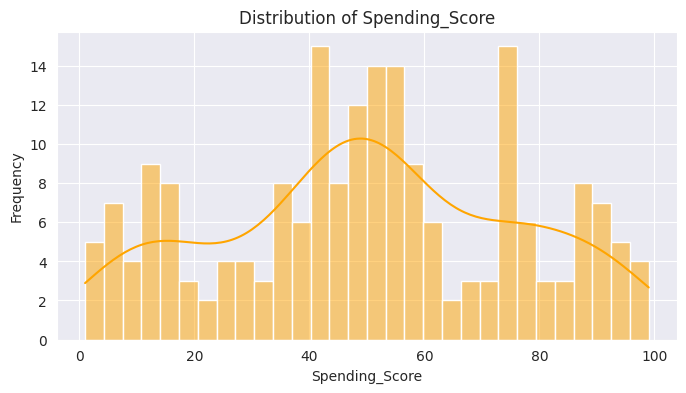

In [66]:
numeric_cols = df.select_dtypes(include= ["int64"])

for numeric_col in numeric_cols.columns:
  plt.figure(figsize=(8,4))
  sns.histplot(df[numeric_col], bins=30, kde=True, color="orange")
  plt.title(f"Distribution of {numeric_col}")
  plt.xlabel(numeric_col)
  plt.ylabel("Frequency")
  plt.show()

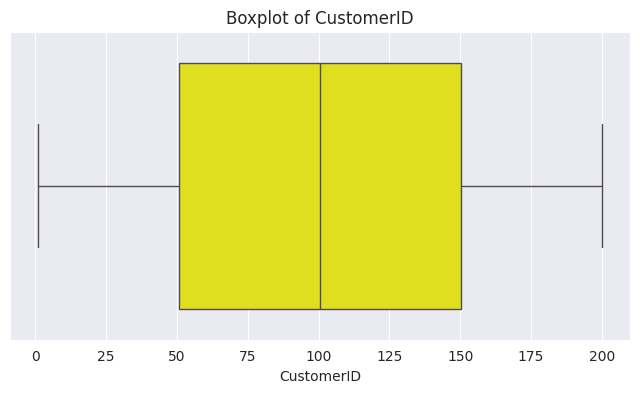

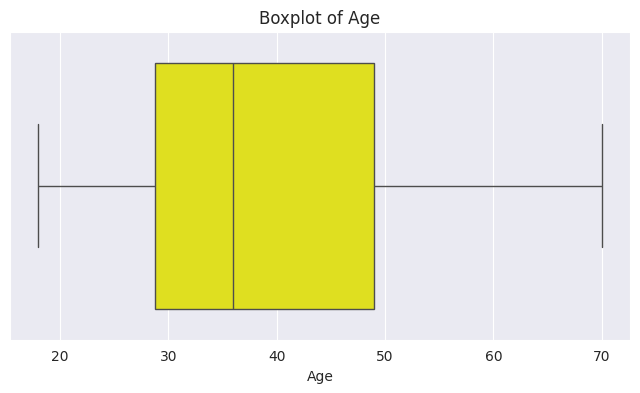

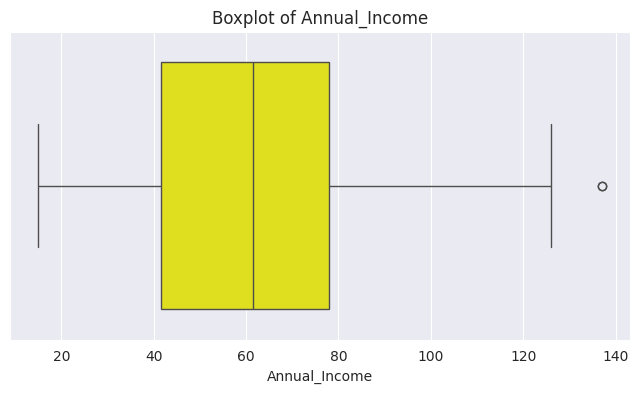

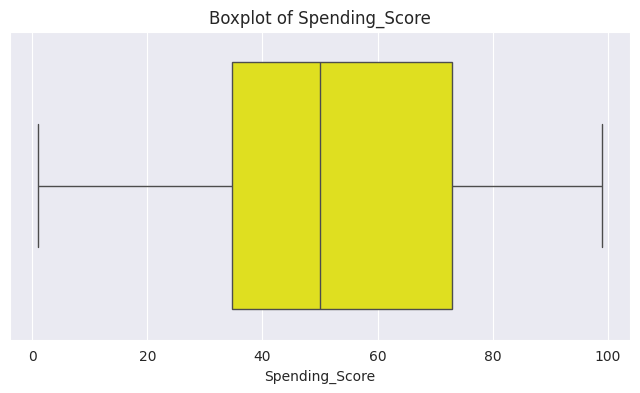

In [67]:
for numeric_col in numeric_cols.columns:
  plt.figure(figsize=(8,4))
  sns.boxplot(x=df[numeric_col], orient="h", color="yellow")
  plt.title(f"Boxplot of {numeric_col}")
  plt.xlabel

In [68]:
df["Gender"].replace({"Male":0, "Female":1}, inplace=True)

correlation

In [69]:
numeric_cols = df[["Age","Annual_Income","Spending_Score"]]
numeric_cols.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<Axes: >

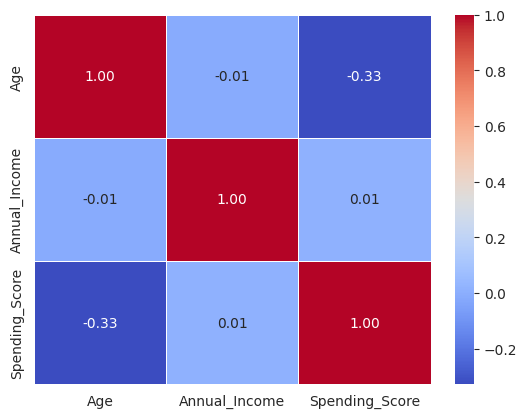

In [70]:
numeric_cols = df[["Age","Annual_Income","Spending_Score"]]
correlation = numeric_cols.corr()

sns.heatmap(correlation , annot = True , cmap = "coolwarm"  ,fmt = ".2f" , linewidths = 0.5)

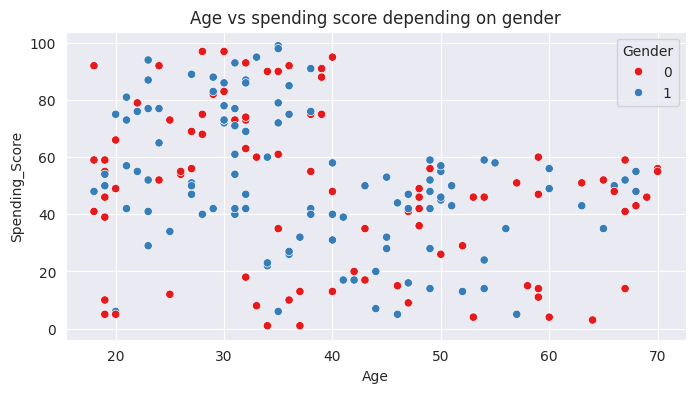

In [71]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df , x="Age" , y = "Spending_Score" , hue="Gender" , palette = "Set1")
plt.title("Age vs spending score depending on gender")
plt.show()

Text(0.5, 1.0, 'Annual Income vs spending score depending on gender')

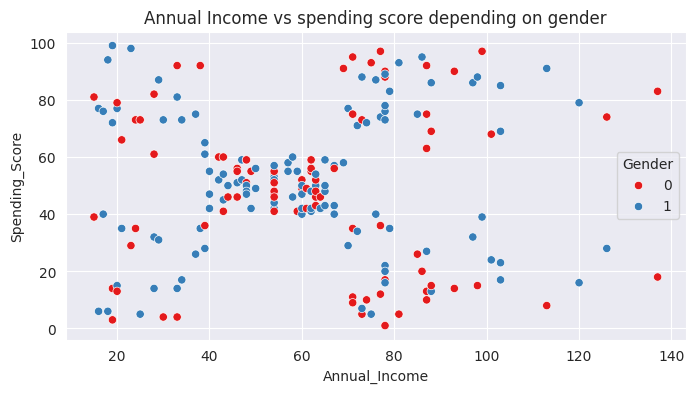

In [72]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df , x="Annual_Income" , y = "Spending_Score" , hue="Gender" , palette = "Set1")
plt.title("Annual Income vs spending score depending on gender")

Text(0.5, 1.0, 'Gender vs Annual Income')

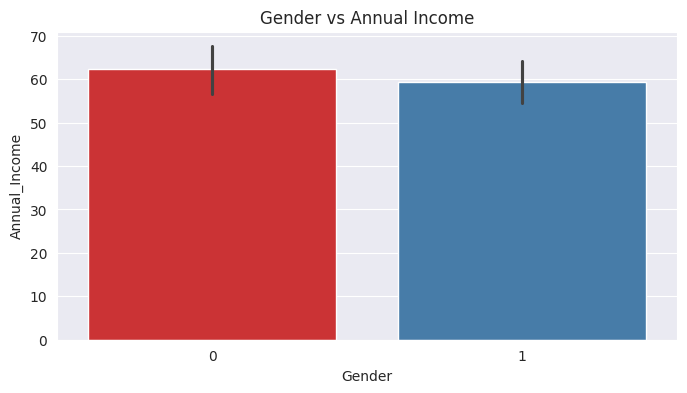

In [73]:
plt.figure(figsize = (8,4))
sns.barplot(data = df , x="Gender" , y = "Annual_Income" , palette = "Set1")
plt.title("Gender vs Annual Income")

## clustering using k-means


1. segmentation using age and spending score

In [76]:
from sklearn.cluster import KMeans

In [77]:

x1 = df[["Age","Spending_Score"]].iloc[:,:].values
inertia = []
for n in range(1,11):
  kmeans = KMeans(n_clusters=n, init="k-means++", random_state=111, n_init=10,
                  max_iter=300, tol=0.001, algorithm='elkan')
  kmeans.fit(x1)
  inertia.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

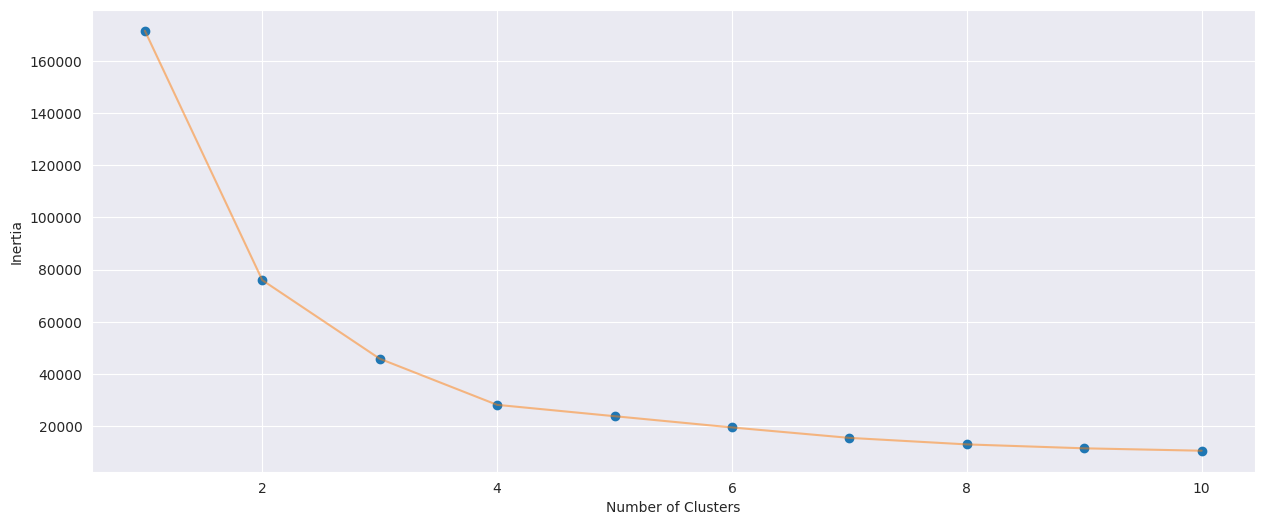

In [78]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, "o")
plt.plot(np.arange(1,11), inertia, "-", alpha = 0.5)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show

In [80]:
algorithm = (KMeans(n_clusters = 4, init = 'k-means++', random_state = 111, n_init = 10, max_iter = 300, tol = 0.001, algorithm = 'elkan'))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


In [81]:
h = 0.02
x_min, x_max = x1[:,0].min() - 1, x1[:,0].max() + 1
y_min, y_max = x1[:,1].min() - 1, x1[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

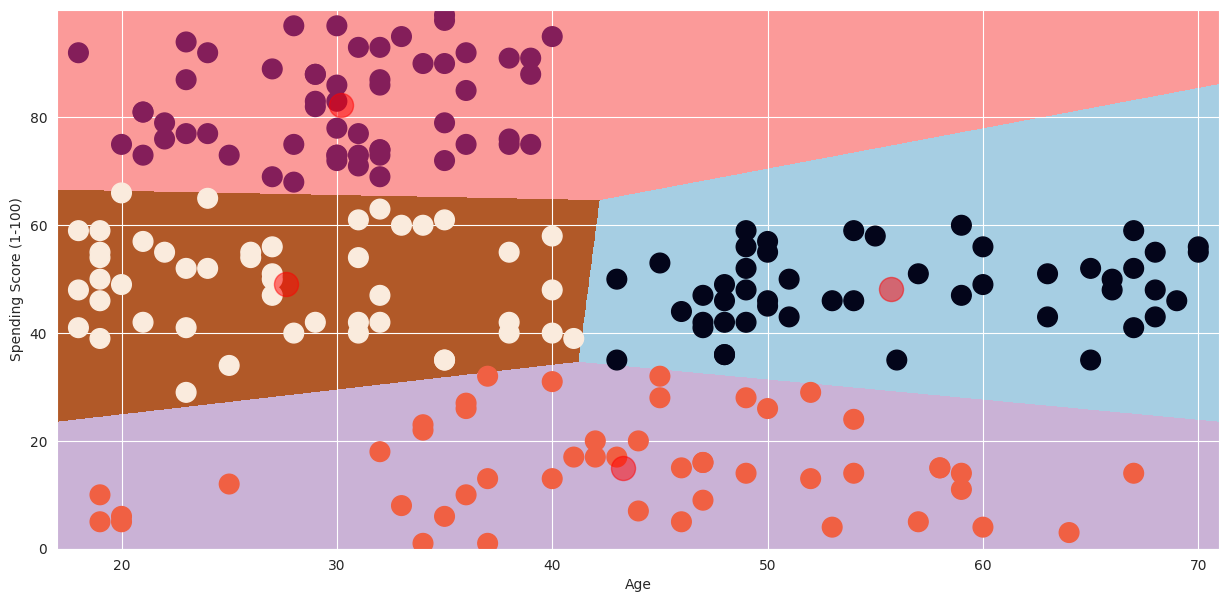

In [82]:
plt.figure(1, figsize = (15,7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest',
         extent = (xx.min(), xx.max(), yy.min(), yy.max()),
         cmap = plt.cm.Paired, aspect = 'auto', origin = 'lower')
plt.scatter(x='Age', y="Spending_Score", data=df, c=labels1, s=200)
plt.scatter(x=centroids1[:,0], y=centroids1[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

Segmentation using annual income and spending score

In [84]:
'''Annual Income and spending Score'''
X2 = df[['Annual_Income' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

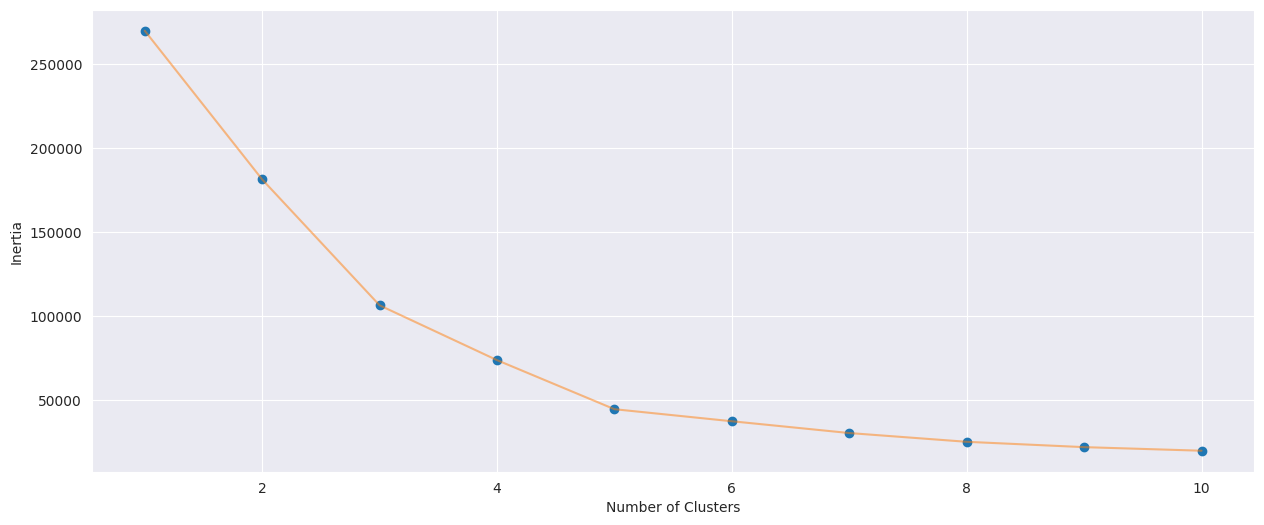

In [85]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [87]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [88]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

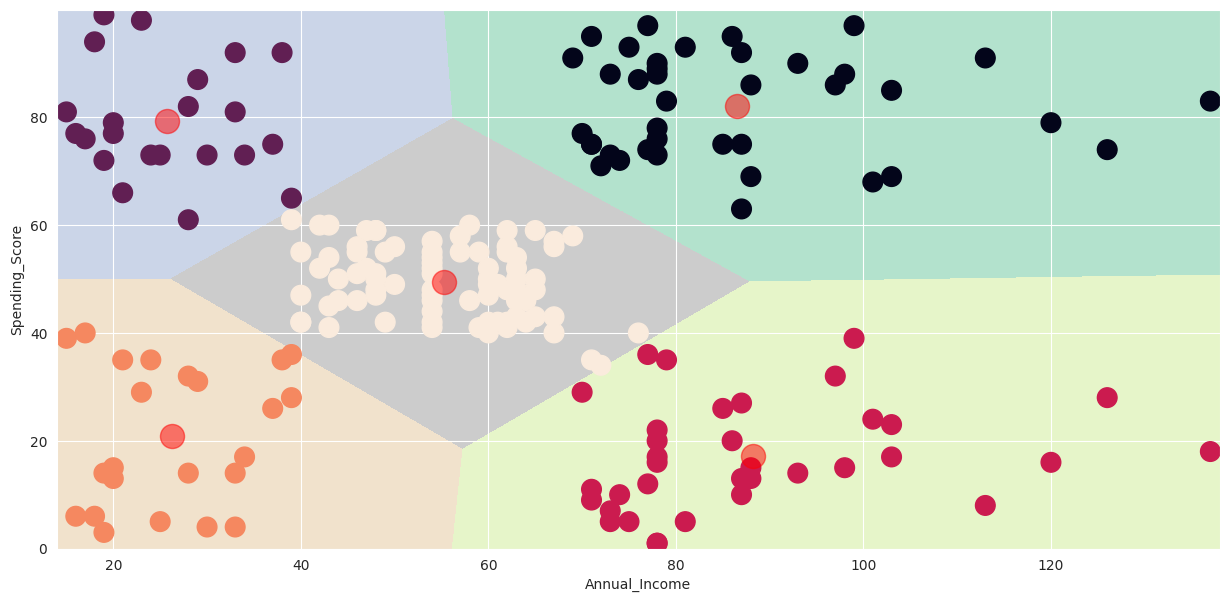

In [89]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual_Income' ,y = 'Spending_Score' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Annual_Income')
plt.show()

Segmentation using Age, annual income and spending score


In [90]:
X3 = df[['Age' , 'Annual_Income' ,'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

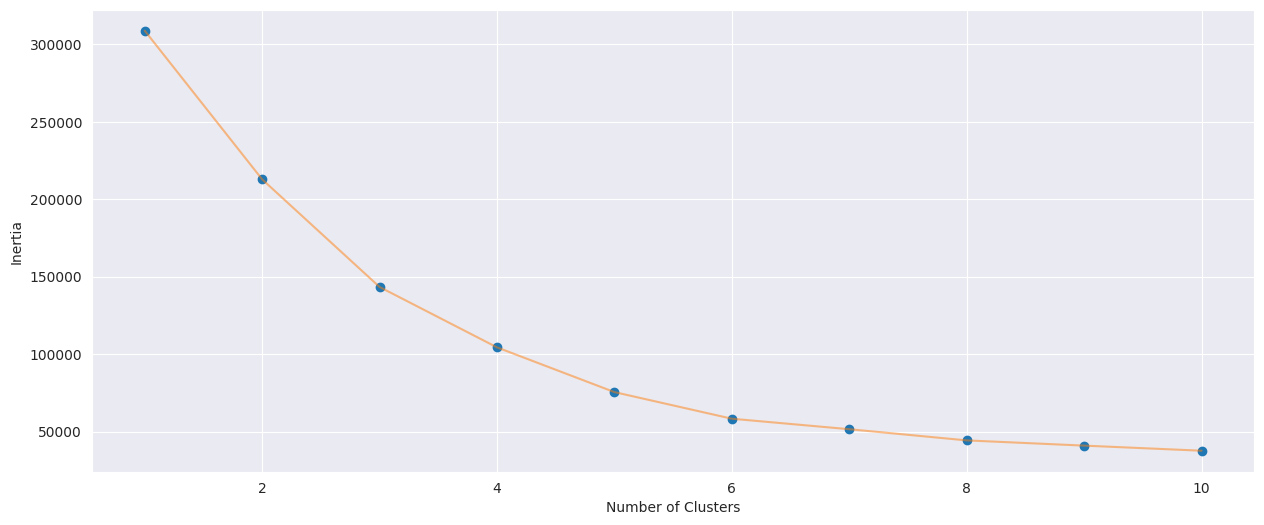

In [91]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [93]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state= 111, algorithm='elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [95]:
import plotly as py
import plotly.graph_objs as go
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending_Score'],
    z= df['Annual_Income'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## Feature selection for the model

Annual income and spending score

In [96]:
df.head(10)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,label3
0,1,0,19,15,39,4
1,2,0,21,15,81,5
2,3,1,20,16,6,4
3,4,1,23,16,77,5
4,5,1,31,17,40,4
5,6,1,22,17,76,5
6,7,1,35,18,6,4
7,8,1,23,18,94,5
8,9,0,64,19,3,4
9,10,1,30,19,72,5


In [98]:
X = df.iloc[:, [3,4]].values

## buliding the model

kmeans algorithm to decide the optimum cluster number, kmeans++ using elbow method

In [99]:
from sklearn.cluster import kmeans_plusplus
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

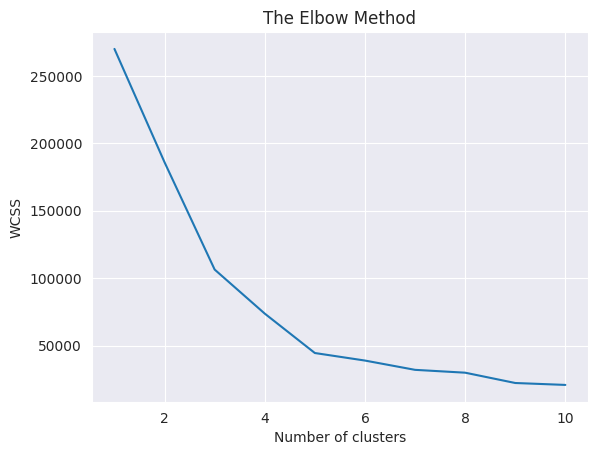

In [100]:
#visualizing the elbow method to get the optimal value for k
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [101]:
# model build
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(X)

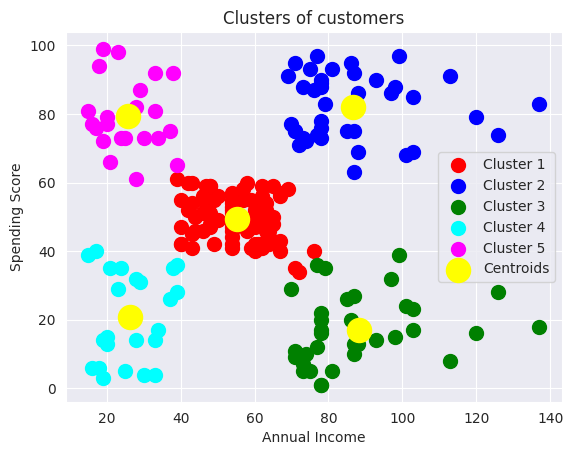

In [102]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Model Interpretation

*   cluster 1 - Earning high but spending less
*   cluster 2 - Average in terms of earning and spending
*   cluster 3 - Earning high and also spending high(TARGET SET)
*   cluster 4 - Earning low but spending more
*   cluster 5 - Earning less, spending less